In [1]:
using JLD, Plots, LaTeXStrings, DataFrames, GLM

In [2]:
data = JLD.load("../data/benchmark_data.jld")

Lx = collect(8:2:30)
Ns = Lx .^ 2

# Fitting
data1 = DataFrame(X = log10.(Ns[end-4:end]), Y = log10.(data["t1_recursion"][end-4:end]))
ols1 = lm(@formula(Y ~ X), data1)
f1(x) = ols1.model.pp.beta0[2] * x + ols1.model.pp.beta0[1]

data2 = DataFrame(X = log10.(Ns[end-4:end]), Y = log10.(data["t1_projection"][end-4:end]))
ols2 = lm(@formula(Y ~ X), data2)
f2(x) = ols2.model.pp.beta0[2] * x + ols2.model.pp.beta0[1]

data3 = DataFrame(X = log10.(Ns[end-4:end]), Y = log10.(data["t2_recursion"][end-4:end]))
ols3 = lm(@formula(Y ~ X), data3)
f3(x) = ols3.model.pp.beta0[2] * x + ols3.model.pp.beta0[1]

data4 = DataFrame(X = log10.(Ns[end-4:end]), Y = log10.(data["t2_projection"][end-4:end]))
ols4 = lm(@formula(Y ~ X), data4)
f4(x) = ols4.model.pp.beta0[2] * x + ols4.model.pp.beta0[1]

f4 (generic function with 1 method)

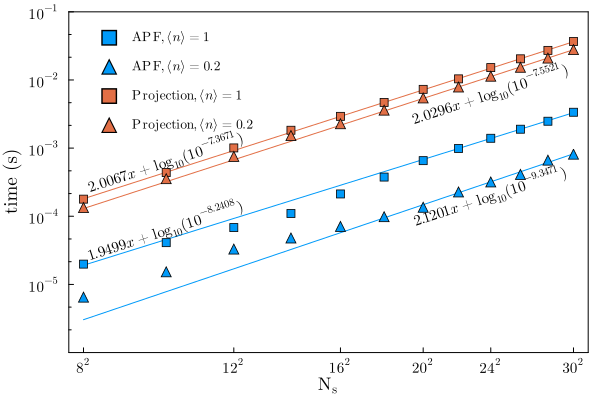

In [3]:
### Plot
cur_colors = get_color_palette(:auto, plot_color(:white))

ticks_x = [log10(8^2), log10(12^2), log10(16^2), log10(20^2), log10(24^2), log10(30^2)]
ticklabels_x = [L"8^2", L"12^2", L"16^2", L"20^2", L"24^2",L"30^2"]

ticks_y = collect(-5:-1)
ticklabels_y = [L"10^{-5}", L"10^{-4}", L"10^{-3}", L"10^{-2}", L"10^{-1}"]

plot(f1, log10(64), log10(900), lc = cur_colors[1], label="")

plt = scatter!(
    log10.(Ns), log10.(data["t1_recursion"]),
    label=L"\mathrm{APF}, \langle n \rangle=1",
    xlabel = L"{\mathrm{N_s}}", ylabel="time (s)",
    mc=cur_colors[1],
    marker=(:square, 4), 
    xticks=(ticks_x,ticklabels_x),
    ylim=(-6,-1), yminorticks=3,
    yticks=(ticks_y,ticklabels_y),
    fontfamily="Computer Modern",
    legendfontsize = 9,
    guidefontsize = 12,
    tickfontsize = 10,
    framestyle=:box, grid=:false,
    legend=:topleft,
    foreground_color_legend = nothing
)

# empty spacing
scatter!(plt, [data1.X[end]], [data1.Y[1]], label=" ", ms=0, mc=:white, msc=:white)

plot!(plt, f3, log10(64), log10(900), lc = cur_colors[1], label="")

scatter!(
    plt,
    log10.(Ns), log10.(data["t2_recursion"]),
    label=L"\mathrm{APF}, \langle n \rangle=0.2",
    mc=cur_colors[1],
    marker=(:utriangle, 5)
)


# empty spacing
scatter!(plt, [data1.X[end]], [data1.Y[1]], label=" ", ms=0, mc=:white, msc=:white)

plot!(plt, f2, log10(64), log10(900), lc = cur_colors[2], label="")

scatter!(
    plt,
    log10.(Ns), log10.(data["t1_projection"]),
    label=L"\mathrm{Projection}, \langle n \rangle=1",
    mc=cur_colors[2],
    marker=(:square, 4)
)

# empty spacing
scatter!(plt, [data1.X[end]], [data1.Y[1]], label=" ", ms=0, mc=:white, msc=:white)

plot!(plt, f4, log10(64), log10(900), lc = cur_colors[2], label="")

scatter!(
    plt,
    log10.(Ns), log10.(data["t2_projection"]),
    label=L"\mathrm{Projection}, \langle n \rangle=0.2",
    mc=cur_colors[2],
    marker=(:utriangle, 5)
)

annotate!(plt, log10(10^2), -4.2, text(L"$1.9499x + \log_{10}(10^{-8.2408})$", 10, rotation=18))
annotate!(plt, log10(10^2), -3.2, text(L"$2.0067x + \log_{10}(10^{-7.3671})$", 10, rotation=18))
annotate!(plt, log10(24^2), -3.7, text(L"$2.1201x + \log_{10}(10^{-9.3471})$", 10, rotation=18))
annotate!(plt, log10(24^2), -2.2, text(L"$2.0296x + \log_{10}(10^{-7.5521})$", 10, rotation=18))

In [4]:
savefig("../figures/Runtime.pdf")
savefig("../figures/Runtime.svg")

"/Users/agdelma/Dropbox/UTK/Projects/AFQMCCanonical/Code/release/figures/Runtime.svg"

In [5]:
### Low Temperature Data
data = JLD.load("../data/benchmark_data_lowT.jld")

Lx = collect(8:2:30)
Ns = Lx .^ 2

# Fitting
data1 = DataFrame(X = log10.(Ns[end-4:end]), Y = log10.(data["t1_recursion"][end-4:end]))
ols1 = lm(@formula(Y ~ X), data1)
f1(x) = ols1.model.pp.beta0[2] * x + ols1.model.pp.beta0[1]

data2 = DataFrame(X = log10.(Ns[end-4:end]), Y = log10.(data["t1_projection"][end-4:end]))
ols2 = lm(@formula(Y ~ X), data2)
f2(x) = ols2.model.pp.beta0[2] * x + ols2.model.pp.beta0[1]

data3 = DataFrame(X = log10.(Ns[end-4:end]), Y = log10.(data["t2_recursion"][end-4:end]))
ols3 = lm(@formula(Y ~ X), data3)
f3(x) = ols3.model.pp.beta0[2] * x + ols3.model.pp.beta0[1]

data4 = DataFrame(X = log10.(Ns[end-4:end]), Y = log10.(data["t2_projection"][end-4:end]))
ols4 = lm(@formula(Y ~ X), data4)
f4(x) = ols4.model.pp.beta0[2] * x + ols4.model.pp.beta0[1]

f4 (generic function with 1 method)

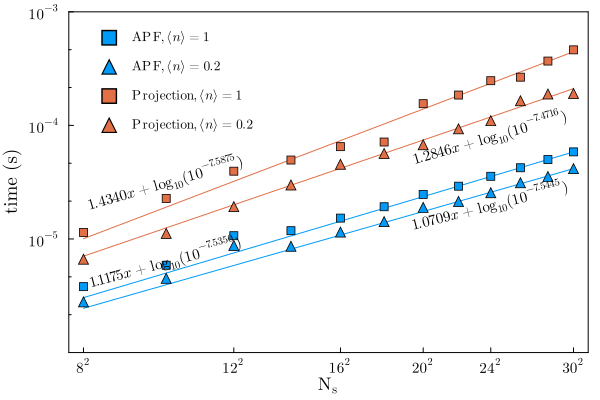

In [6]:
### Plot
cur_colors = get_color_palette(:auto, plot_color(:white))

ticks_x = [log10(8^2), log10(12^2), log10(16^2), log10(20^2), log10(24^2), log10(30^2)]
ticklabels_x = [L"8^2", L"12^2", L"16^2", L"20^2", L"24^2",L"30^2"]

ticks_y = collect(-5:-1)
ticklabels_y = [L"10^{-5}", L"10^{-4}", L"10^{-3}", L"10^{-2}", L"10^{-1}"]

plot(f1, log10(64), log10(900), lc = cur_colors[1], label="")

plt = scatter!(
    log10.(Ns), log10.(data["t1_recursion"]),
    label=L"\mathrm{APF}, \langle n \rangle=1",
    xlabel = L"{\mathrm{N_s}}", ylabel="time (s)",
    mc=cur_colors[1],
    marker=(:square, 4), 
    xticks=(ticks_x,ticklabels_x),
    ylim=(-6,-3), 
    yminorticks=3,
    yticks=(ticks_y,ticklabels_y),
    fontfamily="Computer Modern",
    legendfontsize = 9,
    guidefontsize = 12,
    tickfontsize = 10,
    framestyle=:box, grid=:false,
    legend=:topleft,
    foreground_color_legend = nothing
)

# empty spacing
scatter!(plt, [data1.X[end]], [data1.Y[1]], label=" ", ms=0, mc=:white, msc=:white)

plot!(plt, f3, log10(64), log10(900), lc = cur_colors[1], label="")

scatter!(
    plt,
    log10.(Ns), log10.(data["t2_recursion"]),
    label=L"\mathrm{APF}, \langle n \rangle=0.2",
    mc=cur_colors[1],
    marker=(:utriangle, 5)
)


# empty spacing
scatter!(plt, [data1.X[end]], [data1.Y[1]], label=" ", ms=0, mc=:white, msc=:white)

plot!(plt, f2, log10(64), log10(900), lc = cur_colors[2], label="")

scatter!(
    plt,
    log10.(Ns), log10.(data["t1_projection"]),
    label=L"\mathrm{Projection}, \langle n \rangle=1",
    mc=cur_colors[2],
    marker=(:square, 4)
)

# empty spacing
scatter!(plt, [data1.X[end]], [data1.Y[1]], label=" ", ms=0, mc=:white, msc=:white)

plot!(plt, f4, log10(64), log10(900), lc = cur_colors[2], label="")

scatter!(
    plt,
    log10.(Ns), log10.(data["t2_projection"]),
    label=L"\mathrm{Projection}, \langle n \rangle=0.2",
    mc=cur_colors[2],
    marker=(:utriangle, 5)
)

annotate!(plt, log10(10^2), -5.2, text(L"$1.1175x + \log_{10}(10^{-7.5350})$", 10, rotation=15))
annotate!(plt, log10(10^2), -4.5, text(L"$1.4340x + \log_{10}(10^{-7.5875})$", 10, rotation=16))
annotate!(plt, log10(24^2), -4.7, text(L"$1.0709x + \log_{10}(10^{-7.5445})$", 10, rotation=14))
annotate!(plt, log10(24^2), -4.1, text(L"$1.2846x + \log_{10}(10^{-7.4716})$", 10, rotation=16))

In [7]:
savefig("../figures/Runtime_lowT.pdf")
savefig("../figures/Runtime_lowR.svg")

"/Users/agdelma/Dropbox/UTK/Projects/AFQMCCanonical/Code/release/figures/Runtime_lowR.svg"